In [21]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

import tensorflow as tf
from keras.layers import TFSMLayer
# from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model 
import matplotlib.pyplot as plt

In [22]:
# Load the model as a TFSMLayer
loaded_model = TFSMLayer("bayesian_model", call_endpoint='serving_default')

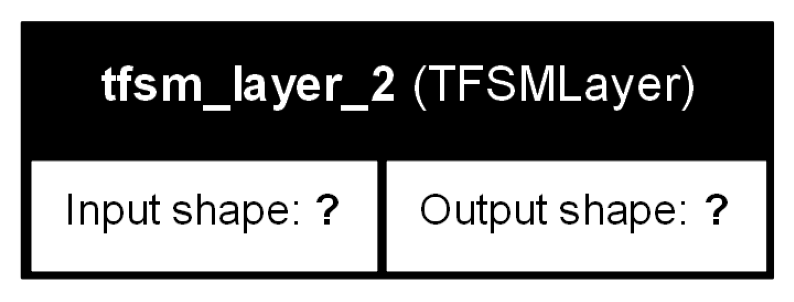

In [23]:
# Visualize the architecture using plot_model from Keras and save as PNG
output_image_path = "model_architecture.png"
plot_model(loaded_model, to_file=output_image_path, show_shapes=True, show_layer_names=True)

# Display the model architecture image
if os.path.exists(output_image_path):
    img = plt.imread(output_image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("Failed to generate the model architecture image.")


In [24]:
import os

# Check if Graphviz is available in the PATH
if os.system("dot -V") == 0:
    print("Graphviz is installed and available.")
else:
    print("Graphviz is not installed or not in the PATH.")


Graphviz is installed and available.


In [5]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow.keras.layers as layers
import tensorflow_probability.python.layers as tfpl
import matplotlib.pyplot as plt
from graphviz import Digraph

# Function to create your Bayesian model
def create_bayesian_model(input_shape=(224, 224, 3), num_classes=2, divergence_fn=None):
    if divergence_fn is None:
        def divergence_fn(q, p, _):
            return tfp.distributions.kl_divergence(q, p) / 8569

    model = tf.keras.Sequential([
        tfpl.Convolution2DReparameterization(
            input_shape=input_shape, 
            filters=4, 
            kernel_size=8, 
            activation='relu',
            kernel_prior_fn=tfpl.default_multivariate_normal_fn,
            kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
            kernel_divergence_fn=divergence_fn,
            bias_prior_fn=tfpl.default_multivariate_normal_fn,
            bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
            bias_divergence_fn=divergence_fn
        ),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        tfpl.DenseReparameterization(
            units=tfpl.OneHotCategorical.params_size(num_classes), 
            activation=None,
            kernel_prior_fn=tfpl.default_multivariate_normal_fn,
            kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
            kernel_divergence_fn=divergence_fn,
            bias_prior_fn=tfpl.default_multivariate_normal_fn,
            bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
            bias_divergence_fn=divergence_fn
        ),
        tfpl.OneHotCategorical(num_classes)
    ])

    return model

# Generate the model
model = create_bayesian_model()

# Now, let's create a Graphviz DSDD diagram based on the model architecture

def create_dsdd_diagram():
    dot = Digraph(comment='DSDD Architecture')
    
    # Add input node
    dot.node('A', 'Input (224x224x3)')
    
    # Feature Extraction Stage
    dot.node('B', 'Convolution2DReparameterization (4 filters, 8x8 kernel, ReLU)')
    dot.node('C', 'MaxPooling2D (2x2)')
    dot.node('D', 'Conv2D (32 filters, 3x3 kernel, ReLU)')
    dot.node('E', 'MaxPooling2D (2x2)')
    dot.node('F', 'Conv2D (64 filters, 3x3 kernel, ReLU)')
    dot.node('G', 'MaxPooling2D (2x2)')
    dot.node('H', 'Conv2D (64 filters, 3x3 kernel, ReLU)')
    dot.node('I', 'MaxPooling2D (2x2)')
    
    # Prediction Stage
    dot.node('J', 'Flatten')
    dot.node('K', 'Dense (512 units, ReLU)')
    dot.node('L', 'Dropout (50%)')
    dot.node('M', 'DenseReparameterization (producing num_classes)')
    dot.node('N', 'OneHotCategorical (Output distribution)')

    # Connect nodes to show the architecture flow
    dot.edge('A', 'B')
    dot.edge('B', 'C')
    dot.edge('C', 'D')
    dot.edge('D', 'E')
    dot.edge('E', 'F')
    dot.edge('F', 'G')
    dot.edge('G', 'H')
    dot.edge('H', 'I')
    dot.edge('I', 'J')
    dot.edge('J', 'K')
    dot.edge('K', 'L')
    dot.edge('L', 'M')
    dot.edge('M', 'N')

    # Render the diagram and save it as an image
    output_file = 'dsdd_architecture'
    dot.render(output_file, format='png')

    # Display the image
    img = plt.imread(output_file)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Generate and display the DSDD diagram
create_dsdd_diagram()


UnidentifiedImageError: cannot identify image file 'dsdd_architecture'